In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
# 'Create New Token' from your 'Kaggle' profile and run it

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# 'Copy API command' from dataset page and run it

!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 146MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Generators

""" We can write custom code using 'OS' module. We will go inside folder and then we will take each file name and then we can send
the data to CNN model, but the problem is since the number of images are more and processing all together is very difficult due to
RAM shortage. So Keras uses concept called 'Generators'. It divides the data into batches and then at a time one batch is loaded into
RAM and then processed. """

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # reshping the image size to 256*256 since CNN expecting size 256*256 but input files size are different.
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize -

'''The images in train and validatation datasets are numpy arrays with values from 0 to 255. To normalize the pixels values between
0 and 1 will divide it by 255.'''

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model_1 = Sequential()

model_1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Flatten())

model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model_1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 90ms/step - loss: 0.6132 - accuracy: 0.6578 - val_loss: 0.5213 - val_accuracy: 0.7342
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4652 - accuracy: 0.7763 - val_loss: 0.4368 - val_accuracy: 0.7996
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3575 - accuracy: 0.8416 - val_loss: 0.4504 - val_accuracy: 0.8036
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2307 - accuracy: 0.9028 - val_loss: 0.6053 - val_accuracy: 0.7718
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1229 - accuracy: 0.9514 - val_loss: 0.8522 - val_accuracy: 0.7838
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0833 - accuracy: 0.9701 - val_loss: 0.9064 - val_accuracy: 0.7836
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0651 - accuracy: 0.9778 - val_loss: 0.9401 - val_accuracy:

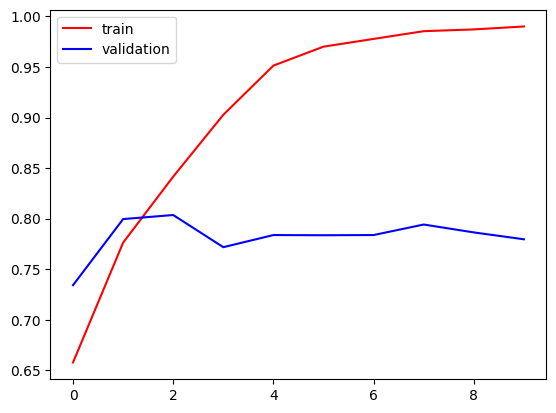

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

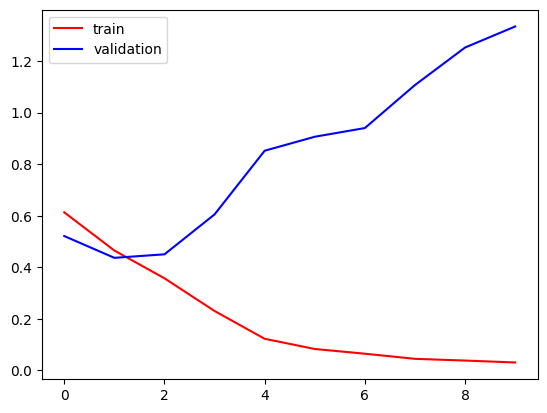

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [14]:
# create CNN model

model_2 = Sequential()

model_2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Flatten())

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1,activation='sigmoid'))

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [16]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history_2 = model_2.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.5069 - accuracy: 0.5760 - val_loss: 0.6349 - val_accuracy: 0.6322
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5750 - accuracy: 0.6969 - val_loss: 0.7064 - val_accuracy: 0.6848
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4962 - accuracy: 0.7638 - val_loss: 0.4868 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4431 - accuracy: 0.8006 - val_loss: 0.6940 - val_accuracy: 0.6704
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3965 - accuracy: 0.8242 - val_loss: 0.6054 - val_accuracy: 0.7190
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3331 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.8118
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2329 - accuracy: 0.9030 - val_loss: 0.7796 - val_ac

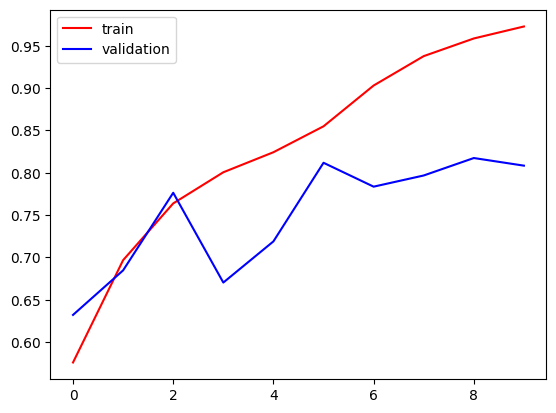

In [18]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'],color='red',label='train')
plt.plot(history_2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

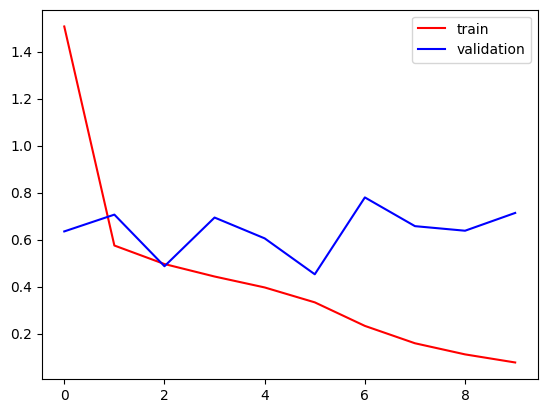

In [19]:
plt.plot(history_2.history['loss'],color='red',label='train')
plt.plot(history_2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [21]:
test_img = cv2.imread('/content/cat.jpg')

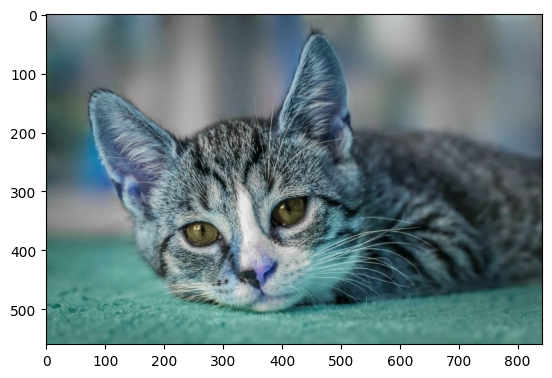

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(560, 842, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model_1.predict(test_input)

1/1 [==============================] - 0s 379ms/step


array([[0.]], dtype=float32)

In [27]:
model_2.predict(test_input)

1/1 [==============================] - 0s 102ms/step


array([[0.]], dtype=float32)